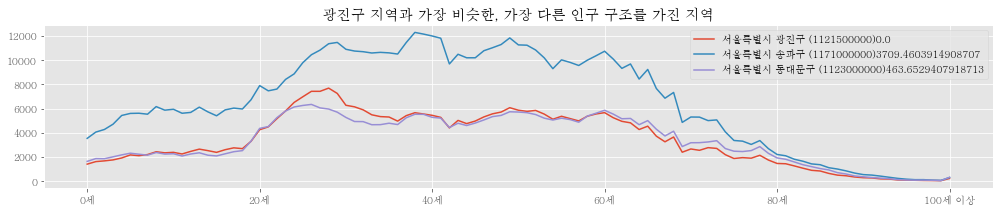

In [28]:
# -*- coding: cp949 -*-
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
plt.rc('font', family='batang')

f = open('202012_202012_연령별인구현황_월간.csv', encoding='cp949')

df = pd.read_csv(f, header = 0, index_col = 0, thousands = ',')

data = df.iloc[1:,2:]

for column_name, item in df.iteritems():
    item = pd.to_numeric(item)    

np_temp = str(data.columns.to_numpy())
np_temp = np_temp.replace('2020년12월_계_', '')

data.columns = data.columns.str.replace('2020년12월_계_', '')

standard = data.loc['서울특별시 광진구 (1121500000)', :]


max_row = standard
max_num = 0

min_row = standard
min_num = 0

max_first = True
min_first = True

for index, rows in data.iterrows():
    if standard.name != rows.name:
        np_std = standard.to_numpy()
        np_row = rows.to_numpy()
        
        sub = sum((np_std - np_row) ** 2)
        
        if max_first:
            max_num = sub
            max_row = rows
            max_first = False
        elif max_num < sub:
            max_num = sub
            max_row = rows
        if min_first:
            min_num = sub
            min_row = rows
            min_first = False
        elif min_num > sub:
            min_num = sub
            min_row = rows

            
max_result_num = str(np.sqrt(max_num / 101))
min_result_num = str(np.sqrt(min_num / 101))

plt.figure(figsize=(17, 3))
plt.style.use('ggplot')
standard.plot()
max_row.plot()
min_row.plot()
plt.title("광진구 지역과 가장 비슷한, 가장 다른 인구 구조를 가진 지역")
plt.legend([standard.name + "0.0", max_row.name + max_result_num, min_row.name + min_result_num])
plt.show()